<a href="https://colab.research.google.com/github/ezreth/programacdp/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2

Proyecto desarrollado por Diego López

# Ejercicio 1

Importación de librerias necesarias para el proyecto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Fichero autos.csv

In [57]:
autos = pd.read_csv('autos.csv',sep=";")
autos.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0




Generar una función y utilizar esta para recodificar la variable “país de
origen” (1, 2, 3) en el dataframe a través de la función apply.

In [ ]:
def codifica(valor):
  '''
  Funcion que codifca la variable Pais Origen a 1,2 o 3

  Parametro
  ---------

  'valor' : serie qe contiene el pais de origen del auto

  Ejemplo
  -------

  autos["Pais_Origen"].apply(codifica)
  '''
  if valor == 'USA': #verifico el valor de cada elemento de la serie y recodifico
    return(1)
  elif valor == 'Europe':
    return(2)
  elif valor == 'Japan':
    return(3)


autos["Pais_Origen"].apply(codifica) #aplico la función con apply
autos.head()





,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0


# Ejercicio 2

Generar un Notebook Colab con código y resultados, que contiene
información de autos de un periodo de tiempo. Resolver los siguientes:
- Limpieza y tratamiento de las variables (Según corresponda)


In [58]:
#Se verifica si existen valores perdidos
autos.isnull().sum()

Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
dtype: int64

In [59]:
# Imputamos la variable Millas_Por_Galon con la media
autos['Millas_Por_Galon'].fillna(autos['Millas_Por_Galon'].mean(), inplace=True)
print("valores perdidos en Millas_Por_Galon: " +
      str(autos['Millas_Por_Galon'].isnull().sum()))

# Imputamos la variable Caballo_De_Fuerza con la moda
autos['Caballo_De_Fuerza'].fillna(autos['Caballo_De_Fuerza'].mode()[0], inplace=True)
print("Valores perdidos en Caballo_De_Fuerza: " +
      str(autos['Caballo_De_Fuerza'].isnull().sum()))

valores perdidos en Millas_Por_Galon: 0
Valores perdidos en Caballo_De_Fuerza: 0


- Generar 5 nuevas variables aplicando los siguientes criterios con las
variables numéricas:

1. Log10(var1/var2)
2. Sqrt(var1)*exp(var2)/200
3. Si var 1 > var 2 → 5, caso contrario 3
4. 1/logn(var1/var2)*100
5. var2**2/var1

In [60]:
autos = (     # añadiendo variables con lambda
    autos
    .assign(v1 = lambda x: np.log10(x['Desplazamiento']/x['Aceleracion'])) #Log10(var1/var2)
    .assign(v2 = lambda x: np.sqrt(x['Cilindros'])*np.exp(x['Millas_Por_Galon'])/200) #Sqrt(var1)*exp(var2)/200
    .assign(v3 = lambda x: np.where(x["Aceleracion"] < x["Millas_Por_Galon"], 5, 3)) #Si var 1 > var 2 → 5, caso contrario 3
    .assign(v4 = lambda x: 1/np.log(x['Caballo_De_Fuerza']/x['Millas_Por_Galon'])*100 ) #1/logn(var1/var2)*100
    .assign(v5 = lambda x: x['Millas_Por_Galon']**2/x['Desplazamiento']) #var2**2/var1

)

autos.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,v1,v2,v3,v4,v5
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.407957,928572.188590,5,50.577527,1.055375
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.483370,46230.887038,5,41.703239,0.642857
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.461034,928572.188590,5,47.163948,1.018868
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.403692,125668.580148,5,44.681823,0.842105
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.458818,341602.617826,5,47.428676,0.956954


# Ejercicio 3

Crear una función que permita generar 3 variables cualitativas
ordinales a partir de las variables numéricas con los siguientes criterios:

★ Si es mayor a la “media + 1*desviación estándar” → Alto

★ Si está entre “media - 1*desviación estándar” y “media + 1*desviación estándar” → Medio

★ Si es menor a la “media - 1*desviación estándar” → Bajo

Nota: Mostrar con las nuevas variables generadas.

Elegir con libertad las variables a trabajar.

La función debe contar con su respectiva documentación.

In [64]:
def addvariables(valor:pd.Series,opcion:int)-> str: #parametros

  '''
  Función para determinar si un valor es alto con respecto a la mediana mas uno multiplicado por la desviación estandard
  o esta entre la mediana menos uno multiplicado por la desviación estandard y la mediana mas uno multiplicado por la desviación estandard
  o es bajo con respecto a la mediana menos uno multiplicado por la desviación estandard.

  Parámetros
  ----------

  `valores` : serie con los valores a comparar.
  `opcion` : numero que indica la opción que quiero comparar 1: Alto, 2: Medio, 3: Bajo.

  Dependiendo del resultado la funcion retornara la palabra "Alto" o "Medio o "Bajo" dependiendo del
  resultado de la comparación.

  Ejemplos:
  valores = [1.2,2.3,1.5]
  addvariables(valores,1) #si el valor es alto la función retorna la palabra "Alto"
  --------

  '''
  retorna= ""
  if opcion == 1:
    retorna = alto(valor)
  elif opcion == 2:
    retorna = medio(valor)
  elif opcion == 3:
    retorna = bajo(valor)
  return (retorna)

def alto(valor:pd.Series)-> str:
  '''
  Funcion que calcula si cada valor de una serie de pandas es mayor a la media mas uno multiplicado
  por la desviación estandar, si cumple con esta condición retornará la palabra "Alto"

  Parámetro
  ---------
  'valores' : serie con valores a comparar de tipo float

  Ejemplo
  -------
  valores = [1.2,2.3,1.5]
  alto(valores) #si cumple con la condición retorna la palabra "Alto"
  '''

  alt = np.mean(valor) + 1 * np.std(valor)
  for i,v in valor.items():
    if v > alt:
      return "Alto"
    else:
      return ""

def medio(valor:pd.Series)-> str:

  '''
  Funcion que calcula si cada valor de una serie de pandas esta entre la media menos uno multiplicado
  por la desviación estandar y la media mas uno multiplicado
  por la desviación estandar, si cumple con esta condición retornará la palabra "Medio"

  Parámetro
  ---------
  'valores' : serie con valores a comparar de tipo float

  Ejemplo
  -------
  valores = [1.2,2.3,1.5]
  medio(valores) #si cumple con la condición retorna la palabra "Medio"
  '''

  alt = np.mean(valor) + 1 * np.std(valor)
  baj = np.mean(valor) - 1 * np.std(valor)
  for i,v in valor.items():
    if (v < baj) &  (v > alt):
      return "Medio"
    else:
      return ""

def bajo(valor:pd.Series)-> str:
  '''
  Funcion que calcula si cada valor de una serie de pandas es menor a la media menos uno multiplicado
  por la desviación estandar, si cumple con esta condición retornará la palabra "Bajo"

  Parámetro
  ---------
  'valores' : serie con valores a comparar de tipo float

  Ejemplo
  -------
  valores = [1.2,2.3,1.5]
  bajo(valores) #si cumple con la condición retorna la palabra "Alto"
  '''
  baj = np.mean(valor) - 1 * np.std(valor)
  for i,v in valor.items():
    if v < baj:
      return "Bajo"
    else:
      return ""

In [62]:
#aplico la función en el dataframe autos y para generar las nuevas variables

autos["vc1"] = addvariables(autos["Aceleracion"],1)
autos["vc2"] = addvariables(autos["Aceleracion"],2)
autos["vc3"] = addvariables(autos["Aceleracion"],3)

autos.head()



,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,v1,v2,v3,v4,v5,vc1,vc2,vc3
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.407957,928572.188590,5,50.577527,1.055375,,,Bajo
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.483370,46230.887038,5,41.703239,0.642857,,,Bajo
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.461034,928572.188590,5,47.163948,1.018868,,,Bajo
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.403692,125668.580148,5,44.681823,0.842105,,,Bajo
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.458818,341602.617826,5,47.428676,0.956954,,,Bajo


# Ejercicio 4

Crear una función que muestre los siguientes gráficos
(simultáneamente) para las variables numéricas, según una variable
cualitativa:

❖ Cajas y bigotes

❖ Barras de la media

❖ Histograma con densidad (Curva)

La función debe contar con su respectiva documentación.

<ipython-input-65-d2d9f02a2482>:17: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  table = pd.pivot_table(df, index=[cualitativa],


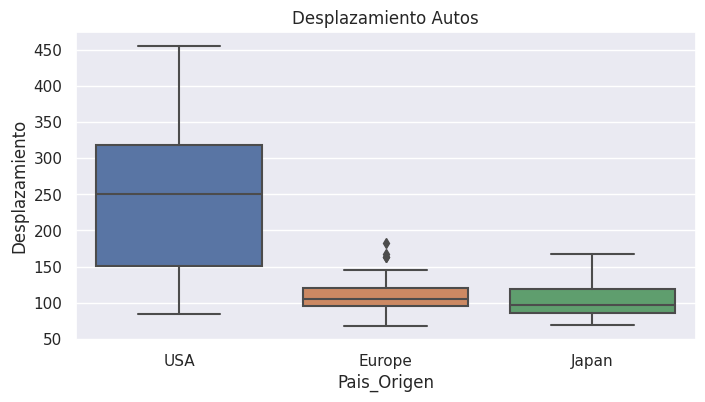

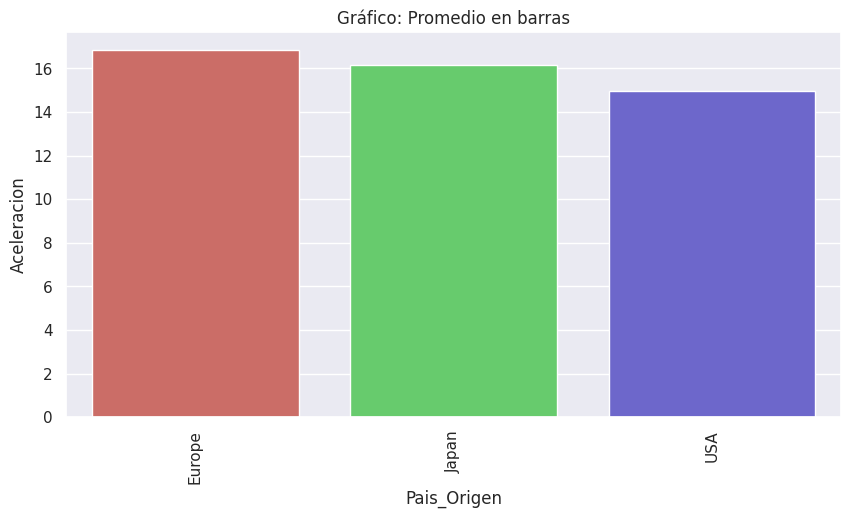

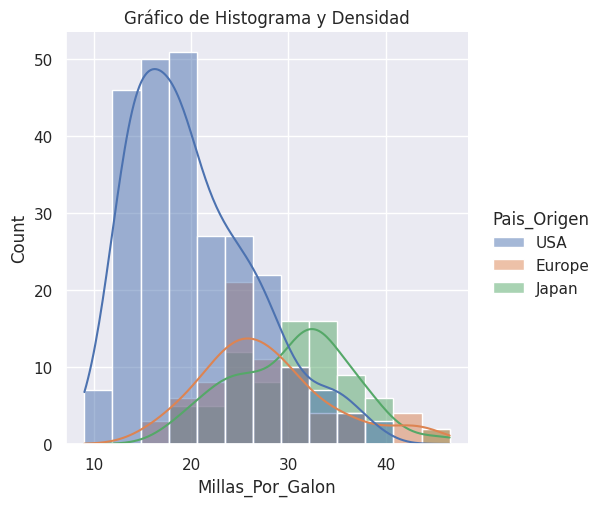

In [65]:
def graficos(df,cualitativa,v1,v2,v3,v4):

  '''
  Función que grafica tres gráficos:
  - Cajas y bigote
  - Barras de la media
  - Histograma de densidad con curva

  Parametros
  ----------
  'df' : dataframe que contiene la información que se esta analizando
  'cualitativa' : variable cualitativa que es la base para graficar
  'v1' : cualquier variable numérica a comparar segun la variable cualitativa
  'v2' : cualquier variable numérica a comparar segun la variable cualitativa
  'v3' : cualquier variable numérica a comparar segun la variable cualitativa
  'v4' : cualquier variable numérica a comparar segun la variable cualitativa

  Ejemplo
  -------
  En este ejemplo tenemos un dataframe con información de autos que tiene campos
  tales como marcas, cilindraje, aceleración, desplazamiento entre otros

  cualitativa en este caso puede ser la marca o el pais de origen
  v1 a v4 son los valores como aceleración, cilindraje o cualquier campo numerico
  '''

  fig, ax = plt.subplots(figsize=(8, 4))

  sns.boxplot( # violinplot boxplot
          x     = cualitativa,  # variable cualitativa
          y     = v1,  # variable cuantitativa
          data  = df,   # dataframe
          ax    = ax
          )
  ax.set_title(v1 + ' Autos');

  table = pd.pivot_table(df, index=[cualitativa],
               aggfunc="mean").reset_index().round(2)


  plt.figure(figsize=(10,5))

  g = sns.barplot(y=v2,
            x=cualitativa,
            data=table,
            palette="hls" # "Blues"
            )
  g.set_xlabel(cualitativa)
  g.set_ylabel(v2)
  g.set_title("Gráfico: Promedio en barras")

  #plt.axhline(5000, color = 'red')  # añadimos una línea
  plt.xticks(rotation=90)  # rotación del texto eje X
  plt.show()

  sns.displot(data=autos, x=v4,hue=cualitativa, kde=True, color="green")
  sns.set(rc={'figure.figsize':(5,7)})
  plt.title("Gráfico de Histograma y Densidad")

graficos(autos,'Pais_Origen','Desplazamiento','Aceleracion','Anyo','Millas_Por_Galon')


# Ejercicio 5

Crear una función que devuelva un mapa de calor con la correlación
de todas las variables numéricas (incluye las generadas), para cada
país.

● La función debe contar con su respectiva documentación.

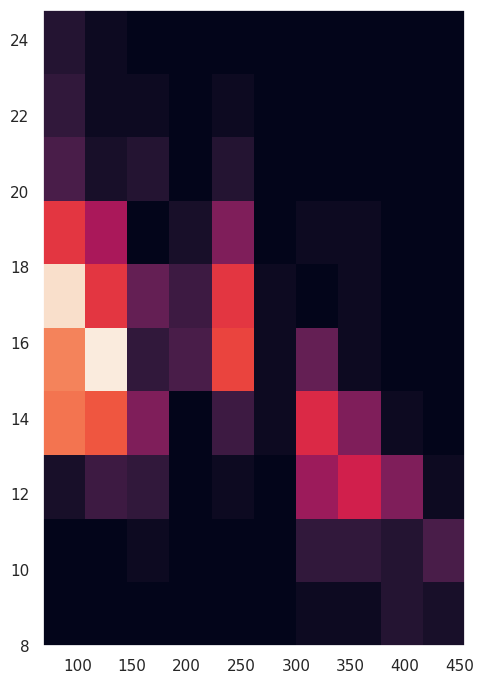

In [63]:
def mapacalor(df,cr1,cr2):

  '''

  Función para graficar un mapa de calor por cada pais para medir la correlación de dos variables del
  dataset autos

  Parametros
  ----------
  'df' : dataframe con la información cargada desde algún origen de datos(csv,base de datos)
  'cr1': variable numerica
  'cr2': varible numerica que se revisar la correlación con la primera variable

  Ejemplo
  -------
  En este ejemplo se quiere graficar la correlacion entre el desplazamiento y la aceleracion del
  dataframe autos

  mapacalor(autos,'Desplazamiento','Aceleracion')
  '''
  fig, ax = plt.subplots(tight_layout = True)

  hist = ax.hist2d( df[cr1],df[cr2])


mapacalor(autos,'Desplazamiento','Aceleracion')